In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV  #Perforing grid search
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

In [3]:
data = pd.read_csv('data_v3.1.csv')

In [4]:
data.head(5)

,Unnamed: 0,profile_id,company,size,industry,hq_country,level,tenure,tot_tenure,avg_tenure,target,salary,country,continent,int_count,skill_count,qual_type,degree,have_web,title
0,0,TX2lkDILT7ipMZ_6jt6X,panti asuhan kerahiman hawai papua,Unknown,NaN,NaN,NaN,22646,0.0,0.0,loyal,Unknown,indonesia,asia,0.0,0.0,none,NaN,N,none
1,1,-drFXizgQaSS6QApPYZQ,autoprofit marketing pte,Unknown,NaN,NaN,NaN,21823,0.0,0.0,loyal,"55,000-70,000",singapore,asia,0.0,8.0,none,NaN,N,none
2,2,DY0Ed5iVQcy15UPDS1i7,cherrybelle,Unknown,NaN,NaN,NaN,2192,0.0,0.0,loyal,Unknown,indonesia,asia,0.0,0.0,none,NaN,N,none
3,3,HelFHtkjT0C-ab89XR7m,"second to none, inc.",1001-5000,market research,united states,NaN,6210,0.0,0.0,loyal,Unknown,indonesia,asia,0.0,6.0,none,NaN,Y,none
4,4,17tAIFLSQCWi7SNRapja,microsoft,10001+,computer software,united states,c,22281,0.0,0.0,loyal,Unknown,singapore,asia,0.0,3.0,none,NaN,Y,c


In [5]:
data.describe()

,Unnamed: 0,tenure,tot_tenure,avg_tenure,int_count,skill_count
count,529132.000000,529132.000000,529132.000000,529132.000000,529132.000000,529132.000000
mean,264565.500000,1113.800314,2038.325465,759.536388,1.815078,20.185698
std,152747.395655,1304.123331,2659.142882,973.848076,7.288523,18.771527
min,0.000000,28.000000,-10957.000000,-3652.333333,0.000000,0.000000
25%,132282.750000,336.000000,0.000000,0.000000,0.000000,10.000000
50%,264565.500000,730.000000,1156.000000,519.000000,0.000000,17.000000
75%,396848.250000,1402.000000,2950.000000,1061.781250,1.000000,25.000000
max,529131.000000,22646.000000,80870.000000,22645.000000,227.000000,647.000000


In [6]:
data = data.drop(['tenure','Unnamed: 0','profile_id','company','industry','hq_country','level','degree'], axis = 1)

In [7]:
data = data[data['tot_tenure'] < 18250]

In [8]:
data = data[data['avg_tenure'] < 18250]

In [9]:
data = data[data['int_count'] < 20]

In [10]:
data = data[data['skill_count'] < 50]

In [11]:
data = data.join(pd.get_dummies(data['size']))
data = data.drop('size', axis = 1)

In [12]:
data = data.join(pd.get_dummies(data['country']))
data = data.drop('country', axis = 1)

In [13]:
data['salary'] = data['salary'].replace({'Unknown':'PNT'})

In [14]:
data = data.join(pd.get_dummies(data['salary']))
data = data.drop('salary', axis = 1)

In [15]:
data = data.join(pd.get_dummies(data['continent']))
data = data.drop('continent', axis = 1)

In [16]:
data = data.join(pd.get_dummies(data['qual_type']))
data = data.drop('qual_type', axis = 1)

In [17]:
data = data.join(pd.get_dummies(data['have_web']))
data = data.drop('have_web', axis = 1)

In [18]:
data['title'] = data['title'].replace({'none':'no_title'})

In [19]:
data = data.join(pd.get_dummies(data['title']))
data = data.drop('title', axis = 1)

In [20]:
data['target'] = data['target'].replace({'loyal':0,'disloyal':1})

In [21]:
#Try to use Linear regression to 

In [22]:
data

,tot_tenure,avg_tenure,target,int_count,skill_count,1-10,10001+,1001-5000,11-50,201-500,...,none,N,Y,c,dir,mgr,no_title,owner,pres,vp
0,0.0,0.000000,0,0.0,0.0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
1,0.0,0.000000,0,0.0,8.0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
2,0.0,0.000000,0,0.0,0.0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
3,0.0,0.000000,0,0.0,6.0,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
4,0.0,0.000000,0,0.0,3.0,0,1,0,0,0,...,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529127,3016.0,430.857143,1,10.0,27.0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
529128,2496.0,832.000000,1,0.0,27.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
529129,1312.0,218.666667,1,14.0,30.0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
529130,1767.0,294.500000,1,0.0,19.0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0


In [23]:
train, test = train_test_split(data, test_size=0.2)

In [24]:
target = 'target'

In [25]:
def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [26]:
predictors = [x for x in train.columns if x not in [target]]


Model Report
Accuracy : 0.7312
AUC Score (Train): 0.719537


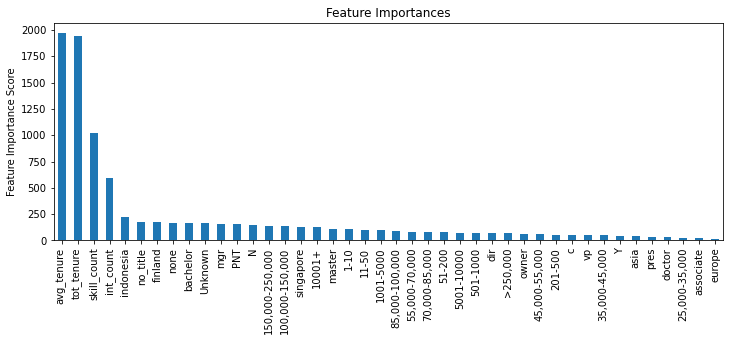

In [25]:
#Choose all predictors except target column
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 use_label_encoder=False)

modelfit(xgb1, train, predictors)

In [31]:
#tune max_depth & min_child_weight
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

C:\Anaconda\envs\newenvt\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:04:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([ 44.76196771,  44.99347534,  52.34294124,  84.06321425,
          83.50112844,  78.60748005, 118.76396036, 112.51743188,
         111.0866221 , 149.59276748, 144.77839661, 122.88858109]),
  'std_fit_time': array([ 0.56001087,  2.37340364,  1.6550547 ,  5.14609797,  3.90603881,
          5.93771092,  2.13034799,  3.44140887,  3.46769246,  3.6102413 ,
          6.00320684, 17.48051819]),
  'mean_score_time': array([0.26868796, 0.27493644, 0.32804761, 0.33807492, 0.36553855,
         0.3374207 , 0.41865158, 0.42490001, 0.42177496, 0.46239009,
         0.44052043, 0.40101037]),
  'std_score_time': array([0.01821818, 0.02118834, 0.02794459, 0.02093972, 0.01593183,
         0.03775142, 0.03029006, 0.05709822, 0.02964047, 0.05811573,
         0.02687591, 0.09454643]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False]

In [33]:
#tune max_depth & min_child_weight further
param_test2 = {
 'max_depth':[6,7,8],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

C:\Anaconda\envs\newenvt\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:37:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([ 78.74936848,  86.95592785,  95.86150842, 112.67672424,
         108.46909032, 114.34813318, 126.55071058, 129.83385324,
         110.15057902]),
  'std_fit_time': array([ 2.53767868,  4.14034797,  4.1235134 ,  2.33202953,  4.51241793,
          2.75875175,  6.90864779, 10.94645092, 19.40727546]),
  'mean_score_time': array([0.33117056, 0.3405457 , 0.33397689, 0.3780376 , 0.39678268,
         0.43427229, 0.42490072, 0.43427343, 0.35616131]),
  'std_score_time': array([0.03478995, 0.03479004, 0.0215266 , 0.03877215, 0.05190393,
         0.03616648, 0.02687696, 0.05171665, 0.09801715]),
  'param_max_depth': masked_array(data=[6, 6, 6, 7, 7, 7, 8, 8, 8],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 4, 5, 6, 4, 5, 6],
               mask=[False, False, False, False, False, False, False, False,
  

In [35]:
#Tune Gamma
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=6,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

C:\Anaconda\envs\newenvt\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:17:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([ 81.41675858,  92.84779825, 101.81783037,  93.82070522,
          86.56902757]),
  'std_fit_time': array([ 2.6020062 ,  6.38894402,  0.31916963,  4.25951755, 26.52705505]),
  'mean_score_time': array([0.32684293, 0.36241484, 0.38740878, 0.35929008, 0.32179956]),
  'std_score_time': array([0.0236611 , 0.02295917, 0.01821765, 0.0296413 , 0.08703241]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.70215204, 0.70209237, 0.70214047, 0.70194105, 0.70225302]),
  'split1_test_score': array([0.70687107, 0.70688533, 0.70691814, 0.70671768, 0.70667039]),
  'split2_test_score': array([0.70484506, 0.70473087, 0.70485692, 0.70493344, 0.70495597]),
  'split3_test_score': array([0.70846416, 0.70819719, 0.70816627, 0

In [36]:
#Tune subsample & colsample_bytree
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=6,
 min_child_weight=5, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

C:\Anaconda\envs\newenvt\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:12:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([ 86.16050081,  95.82173386, 105.05935016, 100.59650011,
         125.81730323, 123.0217473 , 117.79578009, 115.03136253,
         134.79933634, 131.66933594, 129.73183923, 127.99853811,
         150.42252417, 141.68092513, 129.3955667 , 129.46728773]),
  'std_fit_time': array([1.80567882, 9.58042178, 2.47798331, 5.98333076, 2.86177016,
         1.94699936, 3.6926717 , 1.90573507, 1.41275266, 1.76110719,
         2.64067242, 1.0482101 , 2.77349635, 6.45072233, 2.80052516,
         3.05011543]),
  'mean_score_time': array([0.35503936, 0.44168878, 0.44472866, 0.43865771, 0.43065915,
         0.41811929, 0.42290077, 0.44214191, 0.42327185, 0.45099359,
         0.47089157, 0.41880293, 0.47388539, 0.42201176, 0.39950004,
         0.35792804]),
  'std_score_time': array([0.03148125, 0.10550453, 0.04207371, 0.02084178, 0.04183026,
         0.00957313, 0.04664757, 0.05007595, 0.03315821, 0.0233215 ,
         0.03215613, 0.02543748, 0.03146116, 0.04689125, 0.03878753,
 

In [38]:
param_test5 = {
 'subsample':[i/100.0 for i in range(85,100,5)],
 'colsample_bytree':[i/100.0 for i in range(55,70,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=6,
 min_child_weight=5, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

C:\Anaconda\envs\newenvt\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:01:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([ 78.6903954 ,  93.11740279,  93.42149811, 101.47861133,
          99.00812759, 101.18870173, 108.73288417, 106.46186175,
          92.33816609]),
  'std_fit_time': array([ 8.63439541,  2.75030135,  3.99522988,  1.56872944,  0.90063347,
          5.52541535,  2.35334907,  2.12413479, 28.36064349]),
  'mean_score_time': array([0.40496511, 0.43660679, 0.46789455, 0.38122616, 0.46505342,
         0.43923655, 0.44503021, 0.45360417, 0.34046369]),
  'std_score_time': array([0.03633686, 0.03122877, 0.07082825, 0.02804101, 0.02998427,
         0.01510553, 0.03490154, 0.02371275, 0.09777319]),
  'param_colsample_bytree': masked_array(data=[0.55, 0.55, 0.55, 0.6, 0.6, 0.6, 0.65, 0.65, 0.65],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.85, 0.9, 0.95, 0.85, 0.9, 0.95, 0.85, 0.9, 0.95],
               mask=[False, Fal

In [ ]:
#Tune Regularization Parameters
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=6,
 min_child_weight=5, gamma=0.4, subsample=0.9, colsample_bytree=0.55,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4, cv=5)
gsearch6.fit(train[predictors],train[target])


In [42]:
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

({'mean_fit_time': array([74.51163998, 81.95155091, 89.03770709, 91.74294643, 74.56376185]),
  'std_fit_time': array([ 1.03745021,  5.48826946,  2.77434206,  1.53656574, 20.73446248]),
  'mean_score_time': array([0.35268602, 0.40290532, 0.42720442, 0.42307014, 0.34009094]),
  'std_score_time': array([0.02192763, 0.03404723, 0.02731505, 0.03862821, 0.06924399]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.70286267, 0.70269036, 0.70274339, 0.70302061, 0.70121567]),
  'split1_test_score': array([0.7077628 , 0.70776566, 0.70765764, 0.70758067, 0.70633958]),
  'split2_test_score': array([0.70533457, 0.70487781, 0.70539132, 0.70558556, 0.7038269 ]),
  'split3_test_score': array([0.70886962, 0.70882576, 0

In [27]:
#Tune alpha
param_test7 = {
 'reg_alpha':[5, 10, 15, 30]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=6,
 min_child_weight=5, gamma=0.4, subsample=0.9, colsample_bytree=0.55,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4, cv=5)
gsearch7.fit(train[predictors],train[target])
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

C:\Anaconda\envs\newenvt\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:48:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([146.6808393 , 148.09206176, 146.61374054, 145.79017534]),
  'std_fit_time': array([2.02238244, 1.7254068 , 2.53718803, 0.89505227]),
  'mean_score_time': array([0.58385291, 0.64900498, 0.67459812, 0.59048152]),
  'std_score_time': array([0.0593804 , 0.04151495, 0.07704458, 0.05607081]),
  'param_reg_alpha': masked_array(data=[5, 10, 15, 30],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 5},
   {'reg_alpha': 10},
   {'reg_alpha': 15},
   {'reg_alpha': 30}],
  'split0_test_score': array([0.70707508, 0.7073189 , 0.70713185, 0.70669682]),
  'split1_test_score': array([0.70433039, 0.70427842, 0.70417748, 0.70396449]),
  'split2_test_score': array([0.70767864, 0.70762602, 0.70750722, 0.7071989 ]),
  'split3_test_score': array([0.70598234, 0.70610838, 0.70607259, 0.70591643]),
  'split4_test_score': array([0.70799181, 0.70815372, 0.70793239, 0.70723108]),
  'mean_test_score': array([


Model Report
Accuracy : 0.7302
AUC Score (Train): 0.717318


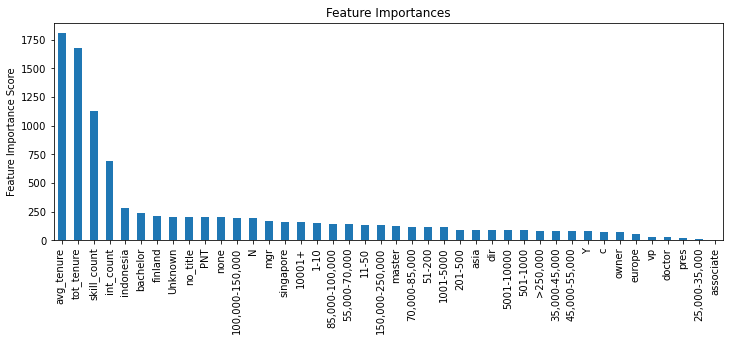

In [28]:
#improved model after tunning
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=5,
 gamma=0.4,
 subsample=0.9,
 colsample_bytree=0.55,
 reg_alpha=10,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, train, predictors)

C:\Anaconda\envs\newenvt\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Model Report
Accuracy : 0.7311
AUC Score (Train): 0.718321


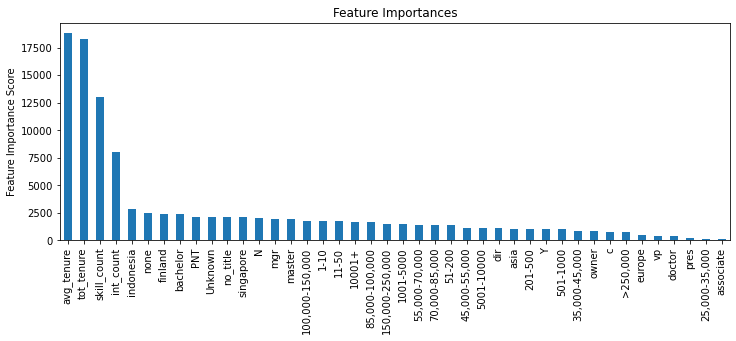

In [27]:
#Now we have optimal hyper-parameters, lower the learning rate and add more trees
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=6,
 min_child_weight=5,
 gamma=0.4,
 subsample=0.9,
 colsample_bytree=0.55,
 reg_alpha=10,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, train, predictors)

C:\Anaconda\envs\newenvt\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Model Report
Accuracy : 0.7317
AUC Score (Train): 0.722518


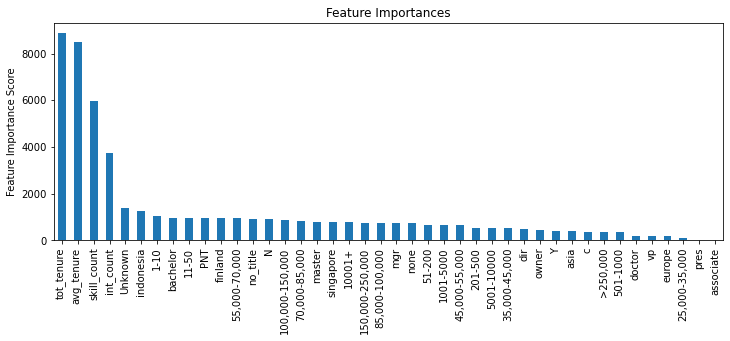

In [28]:
#Apply the final model to the test dataset
modelfit(xgb4, test, predictors)

In [26]:
X = data[predictors]
y = data[target]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [27]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

C:\Anaconda\envs\newenvt\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[88825,   866],
       [35897,   838]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

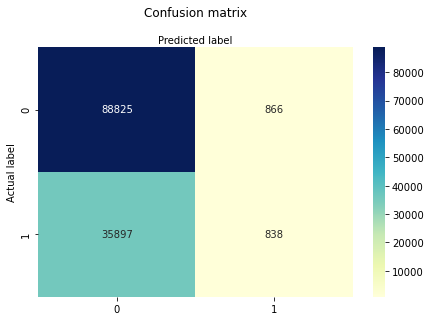

In [29]:
import seaborn as sns
%matplotlib inline


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7092132947336782
Precision: 0.49178403755868544
Recall: 0.02281203212195454


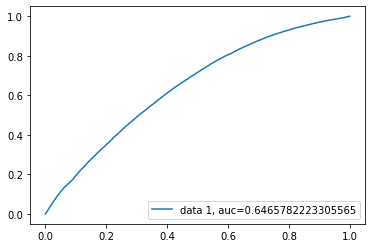

In [31]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

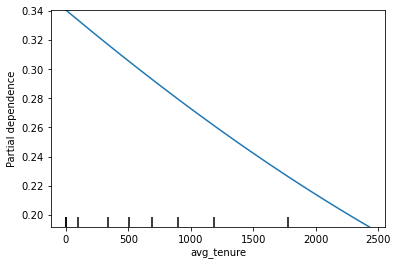

In [35]:
PartialDependenceDisplay.from_estimator(logreg, X_test, ['avg_tenure'])

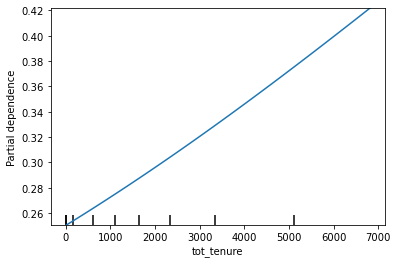

In [36]:
PartialDependenceDisplay.from_estimator(logreg, X_test, ['tot_tenure'])

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

In [33]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence, plot_partial_dependence

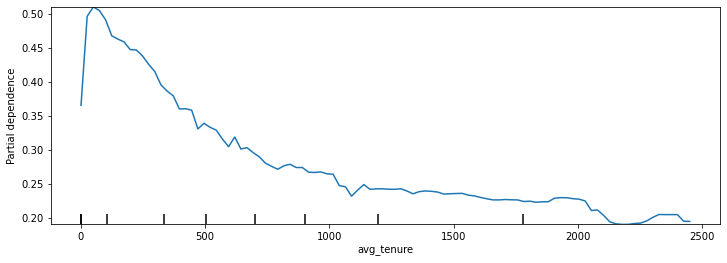

In [47]:
PartialDependenceDisplay.from_estimator(xgb5, train[predictors], ['avg_tenure'])

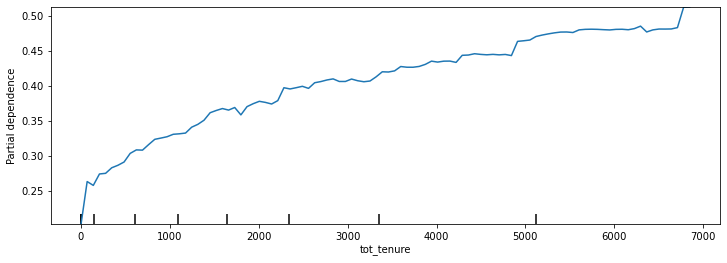

In [48]:
PartialDependenceDisplay.from_estimator(xgb5, train[predictors], ['tot_tenure'])

heat map

In [28]:
import shap

In [29]:
explainer = shap.TreeExplainer(xgb4)
shap_values = explainer.shap_values(train[predictors])

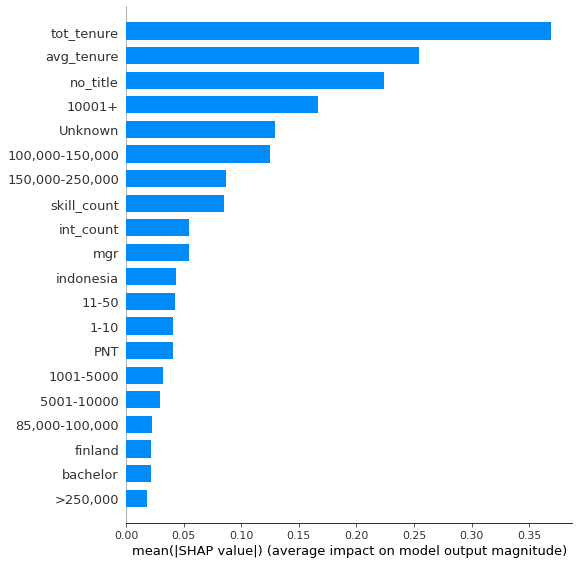

In [30]:
shap.summary_plot(shap_values, train[predictors], plot_type="bar")

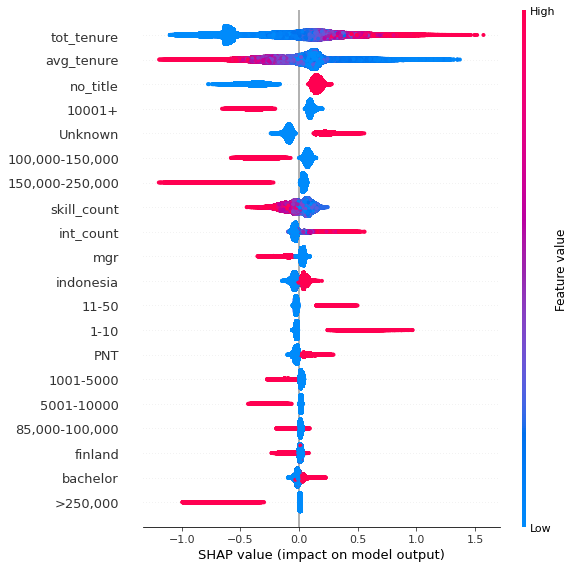

In [31]:
shap.summary_plot(shap_values, train[predictors])

without salary